# Candidate number : 198397

Throughout this file there will be text cells, as you are reading now which provide a brief description of the code below it.
For example the code below prints the text 'Hello World'

In [ ]:
print('Hello World')

Hello World


Sets up the colab file, including initiating imports and mounting the drive.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
import csv

Mounted at /content/gdrive/


Reads the CSVs for the data and converts them into dataframes


In [ ]:
testData=pd.read_csv('/content/gdrive/MyDrive/FML/Assignment/data/test.csv') #loads test data
trainData1=pd.read_csv('/content/gdrive/MyDrive/FML/Assignment/data/training1.csv') #loads training1 data
trainData2=pd.read_csv('/content/gdrive/MyDrive/FML/Assignment/data/training2.csv') #loads training2 data
testData #test to see testData was converted

,CNNs,CNNs.1,CNNs.2,CNNs.3,CNNs.4,CNNs.5,CNNs.6,CNNs.7,CNNs.8,CNNs.9,CNNs.10,CNNs.11,CNNs.12,CNNs.13,CNNs.14,CNNs.15,CNNs.16,CNNs.17,CNNs.18,CNNs.19,CNNs.20,CNNs.21,CNNs.22,CNNs.23,CNNs.24,CNNs.25,CNNs.26,CNNs.27,CNNs.28,CNNs.29,CNNs.30,CNNs.31,CNNs.32,CNNs.33,CNNs.34,CNNs.35,CNNs.36,CNNs.37,CNNs.38,CNNs.39,...,GIST.472,GIST.473,GIST.474,GIST.475,GIST.476,GIST.477,GIST.478,GIST.479,GIST.480,GIST.481,GIST.482,GIST.483,GIST.484,GIST.485,GIST.486,GIST.487,GIST.488,GIST.489,GIST.490,GIST.491,GIST.492,GIST.493,GIST.494,GIST.495,GIST.496,GIST.497,GIST.498,GIST.499,GIST.500,GIST.501,GIST.502,GIST.503,GIST.504,GIST.505,GIST.506,GIST.507,GIST.508,GIST.509,GIST.510,GIST.511
0,0.00000,0.00000,0.00000,0.641460,0.00000,0.010263,0.00000,0.00000,0.00000,NaN,0.000000,0.00000,NaN,NaN,1.09380,0.67192,0.00000,0.0000,NaN,NaN,0.00000,NaN,NaN,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.146000,NaN,0.00000,0.23594,NaN,0.000000,0.023848,0.410790,NaN,0.000000,0.0,...,0.004334,0.006872,0.007383,0.023129,0.015715,0.014801,0.005751,0.018266,NaN,0.027327,0.015378,0.018204,NaN,0.006307,NaN,0.050680,0.003120,0.005427,NaN,0.083366,0.013520,0.014224,0.013778,NaN,0.024670,NaN,0.020640,0.019328,NaN,0.048529,0.013987,0.009278,0.011328,0.010538,NaN,0.013829,0.052630,0.035465,NaN,0.058088
1,0.00000,0.78386,0.00000,0.008242,NaN,0.783720,1.26100,0.00000,NaN,0.000000,NaN,0.00000,NaN,0.83732,0.28559,0.37439,0.34635,0.0000,0.000000,0.00000,0.59925,0.0,0.63904,0.00000,0.000000,NaN,NaN,0.00000,0.00000,0.000000,NaN,NaN,0.00000,0.00000,0.004064,0.000000,NaN,0.000000,NaN,0.0,...,0.017208,0.024160,0.043782,0.029639,0.037706,0.025978,NaN,0.045894,0.027285,0.012793,0.021836,0.024630,0.007313,0.011662,0.012753,0.030091,NaN,NaN,0.017599,0.049867,0.011505,NaN,0.020126,0.015193,0.019641,0.112840,0.147830,0.033717,0.020202,0.022431,0.047402,0.015783,0.008880,0.026375,0.044499,NaN,0.032760,0.019160,0.042316,0.014976
2,0.38465,0.00000,0.00000,0.000000,0.70955,0.000000,0.00000,0.00000,0.00000,0.000000,NaN,0.80505,0.0000,0.00000,0.00000,NaN,0.00000,0.0000,0.000000,0.00000,NaN,NaN,0.00000,1.14640,0.000000,0.73152,0.00000,0.00000,0.00000,NaN,NaN,0.00000,0.00000,0.00000,NaN,0.000000,0.000000,0.000000,NaN,NaN,...,0.026901,NaN,0.029906,0.013477,NaN,0.026310,0.024671,0.051806,NaN,NaN,NaN,NaN,NaN,0.018258,0.028155,0.015256,0.028930,0.020556,NaN,0.035673,0.018933,0.054751,0.029442,NaN,0.025339,NaN,NaN,0.033817,0.033160,0.020813,NaN,0.008986,0.017565,0.026905,0.014389,0.022969,0.027598,NaN,0.024075,0.031379
3,0.00000,0.71303,0.00000,0.571850,0.20295,0.000000,0.18072,0.00000,0.00000,0.323420,0.028327,0.64687,0.0000,0.00000,0.03384,0.00000,NaN,0.0000,0.045159,0.13076,NaN,NaN,0.00000,0.00000,0.190680,0.00000,NaN,0.50899,NaN,0.000000,NaN,0.00000,0.24303,0.00000,0.000000,0.000000,0.000000,0.000000,NaN,0.0,...,0.016763,0.030263,NaN,0.020161,0.003834,0.011930,0.005787,0.013193,NaN,0.018324,0.001617,0.039116,0.024671,NaN,NaN,0.017718,0.001878,0.013104,0.010996,NaN,0.011977,0.018151,0.024082,0.026165,0.020368,0.031549,NaN,0.026506,0.005279,NaN,0.028113,0.035376,0.001820,0.003180,0.016161,0.000948,0.022530,0.013404,0.022238,0.039642
4,NaN,0.50370,NaN,NaN,0.00000,0.000000,NaN,0.47737,0.43069,0.000000,0.000000,0.00000,NaN,0.00000,0.00000,0.24137,NaN,0.5146,0.000000,0.00000,0.87694,0.0,0.81024,0.00000,0.000000,0.76022,1.27470,0.00000,NaN,NaN,0.0,0.00000,NaN,0.00000,0.000000,0.000000,0.410130,0.000000,0.000000,0.0,...,0.016372,0.013736,0.023753,0.036873,0.078999,NaN,0.014637,0.026880,0.013466,0.084849,0.055964,0.007813,0.028473,0.007077,NaN,0.024678,0.032560,0.013846,NaN,0.054825,0.035741,0.029675,NaN,NaN,0.042840,0.024686,0.030309,0.043754,NaN,0.013753,0.016204,0.006194,0.007046,0.027577,0.023283,0.011591,0.086180,0.023861,0.040862,0.021848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

Filters the training data between sunny and not sunny, then for each filters them further to whether they have confidence 1 or confidence not 1

In [ ]:
trainData2sunny = trainData2.loc[trainData2['label'] ==1] # makes dataframe for pictures with sun in it (label = 1)
trainData2notsunny = trainData2.loc[trainData2['label'] !=1] # makes dataframe for pictures with no sun in it (label = 0)
trainData2sunnyConfident = trainData2sunny.loc[trainData2sunny['confidence'] ==1] # makes dataframe for pictures with sun in it (label = 1) and has a confidence of 1
trainData2sunnyNotConfident = trainData2sunny.loc[trainData2sunny['confidence'] !=1] # makes dataframe for pictures with sun in it (label = 1) and has a confidence not equal to 1
trainData2NotSunnyConfident = trainData2notsunny.loc[trainData2notsunny['confidence'] ==1]  # makes dataframe for pictures with no sun in it (label not equal to 1) and has a confidence of 1
trainData2NotSunnyUnConfident = trainData2notsunny.loc[trainData2notsunny['confidence'] !=1]  # makes dataframe for pictures with no sun in it (label not equal to 1) and has a confidence not equal to 1

Fills NaN values of each category by mean of columns

In [ ]:
# fills NaN values of each category by mean of columns
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(fill_value=np.nan, strategy='mean') #use of SimpleImputer class to fill value with it's column mean value
trainData2NaNSunnyConfident = imputer.fit_transform(trainData2sunnyConfident) #uses the imputer on trainData2sunnyConfident
trainData2NaNsunnyNotConfident = imputer.fit_transform(trainData2sunnyNotConfident) #uses the imputer on trainData2sunnyNotConfident
trainData2NaNNotSunnyConfident = imputer.fit_transform(trainData2NotSunnyConfident) #uses the imputer on trainData2NotSunnyConfident
trainData2NaNNotSunnyUnConfident = imputer.fit_transform(trainData2NotSunnyUnConfident) #uses the imputer on trainData2NotSunnyUnConfident

testDataNaN = imputer.fit_transform(testData) # uses the imputer on the testData


Turns them to dataframes

In [ ]:
trainData2NaNSunnyConfident = pd.DataFrame(trainData2NaNSunnyConfident, columns=trainData2sunnyConfident.columns) #converts trainData2NaNSunnyConfident to a dataframe
trainData2NaNsunnyNotConfident = pd.DataFrame(trainData2NaNsunnyNotConfident, columns=trainData2sunnyNotConfident.columns) #converts trainData2NaNsunnyNotConfident to a dataframe
trainData2NaNNotSunnyConfident = pd.DataFrame(trainData2NaNNotSunnyConfident, columns=trainData2NotSunnyConfident.columns) #converts trainData2NaNNotSunnyConfident to a dataframe
trainData2NaNNotSunnyUnConfident = pd.DataFrame(trainData2NaNNotSunnyUnConfident, columns=trainData2NotSunnyUnConfident.columns) #converts trainData2NaNNotSunnyUnConfident to a dataframe
testDataNaN = pd.DataFrame(testDataNaN, columns=testData.columns) #converts testDataNaN to a dataframe
testDataNaN #visual representation to test the NaN's were filled 

,CNNs,CNNs.1,CNNs.2,CNNs.3,CNNs.4,CNNs.5,CNNs.6,CNNs.7,CNNs.8,CNNs.9,CNNs.10,CNNs.11,CNNs.12,CNNs.13,CNNs.14,CNNs.15,CNNs.16,CNNs.17,CNNs.18,CNNs.19,CNNs.20,CNNs.21,CNNs.22,CNNs.23,CNNs.24,CNNs.25,CNNs.26,CNNs.27,CNNs.28,CNNs.29,CNNs.30,CNNs.31,CNNs.32,CNNs.33,CNNs.34,CNNs.35,CNNs.36,CNNs.37,CNNs.38,CNNs.39,...,GIST.472,GIST.473,GIST.474,GIST.475,GIST.476,GIST.477,GIST.478,GIST.479,GIST.480,GIST.481,GIST.482,GIST.483,GIST.484,GIST.485,GIST.486,GIST.487,GIST.488,GIST.489,GIST.490,GIST.491,GIST.492,GIST.493,GIST.494,GIST.495,GIST.496,GIST.497,GIST.498,GIST.499,GIST.500,GIST.501,GIST.502,GIST.503,GIST.504,GIST.505,GIST.506,GIST.507,GIST.508,GIST.509,GIST.510,GIST.511
0,0.000000,0.00000,0.000000,0.641460,0.000000,0.010263,0.000000,0.00000,0.000000,0.146355,0.000000,0.000000,0.321415,0.263478,1.093800,0.671920,0.000000,0.00000,0.229210,0.363612,0.000000,0.182361,0.23640,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.146000,0.218843,0.000000,0.23594,0.140854,0.000000,0.023848,0.410790,0.226587,0.000000,0.00000,...,0.004334,0.006872,0.007383,0.023129,0.015715,0.014801,0.005751,0.018266,0.019651,0.027327,0.015378,0.018204,0.016203,0.006307,0.023831,0.050680,0.003120,0.005427,0.027463,0.083366,0.013520,0.014224,0.013778,0.034948,0.024670,0.041476,0.020640,0.019328,0.020951,0.048529,0.013987,0.009278,0.011328,0.010538,0.024359,0.013829,0.052630,0.035465,0.024145,0.058088
1,0.000000,0.78386,0.000000,0.008242,0.160856,0.783720,1.261000,0.00000,0.248012,0.000000,0.233822,0.000000,0.321415,0.837320,0.285590,0.374390,0.346350,0.00000,0.000000,0.000000,0.599250,0.000000,0.63904,0.00000,0.000000,0.220301,0.328461,0.000000,0.000000,0.000000,0.218843,0.192716,0.00000,0.000000,0.004064,0.000000,0.252635,0.000000,0.238634,0.00000,...,0.017208,0.024160,0.043782,0.029639,0.037706,0.025978,0.020094,0.045894,0.027285,0.012793,0.021836,0.024630,0.007313,0.011662,0.012753,0.030091,0.015159,0.021615,0.017599,0.049867,0.011505,0.045983,0.020126,0.015193,0.019641,0.112840,0.147830,0.033717,0.020202,0.022431,0.047402,0.015783,0.008880,0.026375,0.044499,0.011951,0.032760,0.019160,0.042316,0.014976
2,0.384650,0.00000,0.000000,0.000000,0.709550,0.000000,0.000000,0.00000,0.000000,0.000000,0.233822,0.805050,0.000000,0.000000,0.000000,0.222913,0.000000,0.00000,0.000000,0.000000,0.221743,0.182361,0.00000,1.14640,0.000000,0.731520,0.000000,0.000000,0.000000,0.130329,0.218843,0.000000,0.00000,0.000000,0.355811,0.000000,0.000000,0.000000,0.238634,0.26678,...,0.026901,0.022690,0.029906,0.013477,0.023189,0.026310,0.024671,0.051806,0.019651,0.026667,0.017862,0.018189,0.016203,0.018258,0.028155,0.015256,0.028930,0.020556,0.027463,0.035673,0.018933,0.054751,0.029442,0.034948,0.025339,0.041476,0.049251,0.033817,0.033160,0.020813,0.028211,0.008986,0.017565,0.026905,0.014389,0.022969,0.027598,0.022425,0.024075,0.031379
3,0.000000,0.71303,0.000000,0.571850,0.202950,0.000000,0.180720,0.00000,0.000000,0.323420,0.028327,0.646870,0.000000,0.000000,0.033840,0.000000,0.192822,0.00000,0.045159,0.130760,0.221743,0.182361,0.00000,0.00000,0.190680,0.000000,0.328461,0.508990,0.187855,0.000000,0.218843,0.000000,0.24303,0.000000,0.000000,0.000000,0.000000,0.000000,0.238634,0.00000,...,0.016763,0.030263,0.031214,0.020161,0.003834,0.011930,0.005787,0.013193,0.019651,0.018324,0.001617,0.039116,0.024671,0.017673,0.023831,0.017718,0.001878,0.013104,0.010996,0.042916,0.011977,0.018151,0.024082,0.026165,0.020368,0.031549,0.049251,0.026506,0.005279,0.017668,0.028113,0.035376,0.001820,0.003180,0.016161,0.000948,0.022530,0.013404,0.022238,0.039642
4,0.281557,0.50370,0.232354,0.292003,0.000000,0.000000,0.348771,0.47737,0.430690,0.000000,0.000000,0.000000,0.321415,0.000000,0.000000,0.241370,0.192822,0.51460,0.000000,0.000000,0.876940,0.000000,0.81024,0.00000,0.000000,0.760220,1.274700,0.000000,0.187855,0.130329,0.000000,0.000000,0.20222,0.000000,0.000000,0.000000,0.410130,0.000000,0.000000,0.00000,...,0.016372,0.013736,0.023753,0.036873,0.078999,0.020735,0.014637,0.026880,0.013466,0.084849,0.

Creates the sorted train2data and creates the dataframes for CNN and GIST filtering used later

In [ ]:
trainData2dataframes = [trainData2NaNSunnyConfident, trainData2NaNsunnyNotConfident, trainData2NaNNotSunnyConfident, trainData2NaNNotSunnyUnConfident] #creates a list of the training data 2 dataframes
sortedTrainData2 = pd.concat(trainData2dataframes) #makes the sortedTrainData2 dataframe
CNNsortedTrainData2 = sortedTrainData2 # sets a dataframe to be used later for feature selection
GISTsortedTrainData2 = sortedTrainData2 # sets a dataframe to be used later for feature selection
sortedTrainData2 #visual representation to see it was successful

,CNNs,CNNs.1,CNNs.2,CNNs.3,CNNs.4,CNNs.5,CNNs.6,CNNs.7,CNNs.8,CNNs.9,CNNs.10,CNNs.11,CNNs.12,CNNs.13,CNNs.14,CNNs.15,CNNs.16,CNNs.17,CNNs.18,CNNs.19,CNNs.20,CNNs.21,CNNs.22,CNNs.23,CNNs.24,CNNs.25,CNNs.26,CNNs.27,CNNs.28,CNNs.29,CNNs.30,CNNs.31,CNNs.32,CNNs.33,CNNs.34,CNNs.35,CNNs.36,CNNs.37,CNNs.38,CNNs.39,...,GIST.474,GIST.475,GIST.476,GIST.477,GIST.478,GIST.479,GIST.480,GIST.481,GIST.482,GIST.483,GIST.484,GIST.485,GIST.486,GIST.487,GIST.488,GIST.489,GIST.490,GIST.491,GIST.492,GIST.493,GIST.494,GIST.495,GIST.496,GIST.497,GIST.498,GIST.499,GIST.500,GIST.501,GIST.502,GIST.503,GIST.504,GIST.505,GIST.506,GIST.507,GIST.508,GIST.509,GIST.510,GIST.511,label,confidence
0,0.373510,0.290050,0.377550,0.172170,0.000000,0.000000,0.000000,0.662530,1.301800,0.000000,0.000000,0.216871,0.000000,0.289972,1.823700,0.000000,0.173115,0.00000,1.101900,0.000000,0.000000,0.14064,0.000000,1.678400,0.000000,0.000000,1.046800,0.000000,0.000000,0.000000,0.000000,0.000000,0.254385,0.306070,0.631270,0.895580,0.266090,0.329919,0.000000,0.428123,...,0.020151,0.017083,0.010079,0.014837,0.014841,0.028490,0.011267,0.026864,0.006051,0.009580,0.006189,0.015256,0.003178,0.031356,0.004871,0.005753,0.039314,0.021291,0.001760,0.061693,0.022594,0.023751,0.012351,0.039562,0.041376,0.008531,0.011940,0.021303,0.018484,0.005399,0.007041,0.007484,0.012602,0.002727,0.015594,0.012372,0.009573,0.008190,1.0,1.00
1,0.342660,0.446400,0.000000,1.406500,0.106027,0.000000,0.437736,0.000000,0.000000,0.083076,0.236306,0.216871,0.768860,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.122620,0.196586,0.00000,0.267252,0.513340,0.000000,0.000000,0.685150,0.000000,0.249412,0.000000,0.000000,0.204078,0.000000,0.000000,0.157300,0.329201,0.000000,0.000000,0.000000,0.000000,...,0.031969,0.024067,0.031279,0.040002,0.014832,0.027478,0.025730,0.028632,0.021095,0.017266,0.017050,0.017578,0.024869,0.059241,0.017654,0.022854,0.025195,0.099179,0.025167,0.033253,0.033032,0.025688,0.026796,0.030170,0.025373,0.044848,0.023589,0.030316,0.026394,0.021039,0.034658,0.047409,0.024504,0.015142,0.036090,0.022586,0.024609,0.028349,1.0,1.00
2,0.000000,0.197006,0.149720,0.965800,0.351160,0.578080,1.485100,0.328284,0.115790,0.007156,0.857880,0.000000,0.155875,1.296900,0.136220,0.199563,0.161490,0.00000,1.767700,1.451200,0.196586,0.88322,0.618760,0.000000,0.345840,0.295160,0.246530,0.000000,0.249412,0.019227,0.548230,0.204078,0.153220,0.284040,0.668460,0.329201,0.683490,0.221280,1.651300,0.408450,...,0.020981,0.028354,0.024597,0.019576,0.049924,0.100680,0.010903,0.030862,0.023324,0.021711,0.016637,0.021884,0.033287,0.031356,0.017120,0.033544,0.037050,0.021215,0.018547,0.032102,0.035337,0.033282,0.039495,0.047016,0.044708,0.024723,0.021686,0.009810,0.033661,0.007944,0.015736,0.032559,0.020861,0.016352,0.060941,0.010293,0.033476,0.030059,1.0,1.00
3,2.921600,0.197006,0.268906,0.597630,0.000000,0.000000,0.000000,0.328284,0.000000,0.000000,0.055678,0.000000,0.059011,0.289972,0.220888,0.000000,0.000000,0.84142,0.205639,0.000000,0.000000,0.00000,0.267252,0.215329,0.126431,0.000000,0.246530,0.000000,0.000000,0.204230,1.895300,0.216870,0.132390,0.139419,0.327870,0.000000,0.000000,0.000000,0.280372,0.428123,...,0.024145,0.017411,0.033379,0.022920,0.015583,0.020663,0.018320,0.035907,0.021213,0.021533,0.010178,0.006833,0.024869,0.020363,0.014921,0.018367,0.028573,0.036527,0.025743,0.036513,0.017387,0.033282,0.040160,0.043121,0.038988,0.020858,0.021909,0.008877,0.027218,0.008545,0.004871,0.020818,0.023091,0.004353,0.036090,0.020889,0.029630,0.033763,1.0,1.00
4,0.463610,0.249170,0.114090,0.316067,0.000000,0.000000,0.727260,0.712270,0.000000,0.279620,0.250390,0.216871,1.167300,0.076004,0.844740,0.738460,0.447220,0.23659,0.168760,0.444600,0.444570,0.45012,0.620350,0.073994,0.126431,0.208510,1.425500,0.000000,0.000000,0.101690,0.274767,0.535810,0.274340,0.139419,0.000000,0.329201,0.275150,0.378710,0.325820,0.000000,...,0.025150,0.023003,0.027075,0.022239,0.010551,0.015277,0.017217,0.022450,0.021213,0.013318,0.013669,0.007

Performs logistic regression on the sortedtraindata2 and then puts it into a confusion matrix

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy of training data 2 test is:  0.7866666666666666


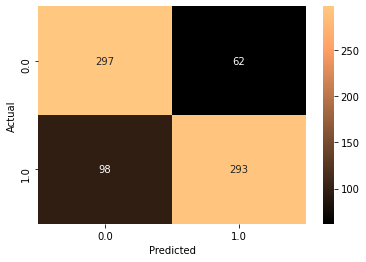

array([1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 1.

In [ ]:
sortedTrainData2Independent = sortedTrainData2.drop(columns = ['label', 'confidence'], axis=1) # drops the columns 'label' and 'confidence' as they aren't independent variables then stores into a new variable for independent variables
sortedTrainData2Labels = sortedTrainData2['label'] # creates a variable for the labels, as this is what needs to be predicted
sortedTrainData2Independent_train,sortedTrainData2Independent_test,sortedTrainData2Labels_train,sortedTrainData2Labels_test = train_test_split(sortedTrainData2Independent,sortedTrainData2Labels,test_size=0.25,random_state=0) #performs train_test_split with a test size of 25% and training size of 75% with no random state
logistic_regression2= LogisticRegression() #creates the logistic regression variable
logistic_regression2.fit(sortedTrainData2Independent_train,sortedTrainData2Labels_train) #fits the independent variables and the labels to the it's logistic regression classifier
sortedTrainData2Labels_pred=logistic_regression2.predict(sortedTrainData2Independent_test) #creates the variable for predictions and uses the classifier to make predictions
confusion_matrix = pd.crosstab(sortedTrainData2Labels_test, sortedTrainData2Labels_pred, rownames=['Actual'], colnames=['Predicted']) #inputs the labels and predictions into a confusion matrix for visualisation
sn.heatmap(confusion_matrix, annot=True,fmt="d",cmap='copper') #visual settings for confusion matrix
print('Accuracy of training data 2 test is: ',metrics.accuracy_score(sortedTrainData2Labels_test, sortedTrainData2Labels_pred))#prints the accuracy of the test
plt.show()
sortedTrainData2Labels_pred

Performs logistic regression on the trainData1 and then puts it into a confusion matrix

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy of training data one test is:  0.7207792207792207


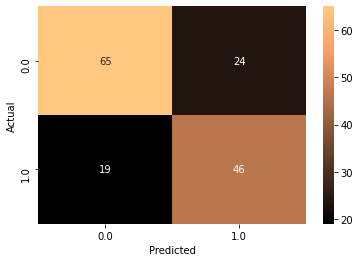

array([1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0.,
       1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0.,
       1.])

In [ ]:
trainData1Independent = trainData1.drop(columns = ['label', 'confidence'], axis=1) # drops the columns 'label' and 'confidence' as they aren't independent variables then stores into a new variable for independent variables
trainData1Labels = trainData1['label']# creates a variable for the labels, as this is what needs to be predicted
trainData1Independent_train,trainData1Independent_test,trainData1Labels_train,trainData1Labels_test = train_test_split(StandardScaler().fit_transform(trainData1Independent),trainData1Labels,test_size=0.25, random_state=0) #performs train_test_split with a test size of 25% and training size of 75% with no random state
logistic_regression1= LogisticRegression() #creates the logistic regression variable
logistic_regression1.fit(trainData1Independent_train,trainData1Labels_train) #fits the independent variables and the labels to the it's logistic regression classifier
trainData1Labels_pred=logistic_regression1.predict(trainData1Independent_test)  #creates the variable for predictions and uses the classifier to make predictions
confusion_matrix = pd.crosstab(trainData1Labels_test, trainData1Labels_pred, rownames=['Actual'], colnames=['Predicted']) #inputs the labels and predictions into a confusion matrix for visualisation
sn.heatmap(confusion_matrix, annot=True,fmt="d",cmap='copper')#visual settings for confusion matrix
print('Accuracy of training data one test is: ',metrics.accuracy_score(trainData1Labels_test, trainData1Labels_pred))#prints the accuracy of the test
plt.show()
trainData1Labels_pred

Combine training data predictions, work out an accuracy and put into a csv

In [ ]:
trainDataCombinedLabels = np.append(trainData1Labels_pred,sortedTrainData2Labels_pred) #combines predictions
avg = (0.78 + 0.7207792207792207)/2 #works out average
print('Accuracy of combined training data results is: ' + str(avg))

Accuracy of combined training data results is: 0.7503896103896104


Logistic regression on the testData

In [ ]:
testDataPrediction = logistic_regression2.predict(testDataNaN)
testDataPredictionDataFrame = pd.DataFrame(testDataPrediction, columns=['prediction']) #makes df
testDataPredictionDataFrame.to_csv('predictions.csv') #makes a csv

Below feature selects the CNNS by removing all the GIST features 

In [ ]:
for gist in CNNsortedTrainData2.columns: # iterates through all the colums and removes any that contain GIST
    if 'GIST' in gist:
        del CNNsortedTrainData2[gist]
CNNsortedTrainData2 # visualisation to check GIST features were removed

,CNNs,CNNs.1,CNNs.2,CNNs.3,CNNs.4,CNNs.5,CNNs.6,CNNs.7,CNNs.8,CNNs.9,CNNs.10,CNNs.11,CNNs.12,CNNs.13,CNNs.14,CNNs.15,CNNs.16,CNNs.17,CNNs.18,CNNs.19,CNNs.20,CNNs.21,CNNs.22,CNNs.23,CNNs.24,CNNs.25,CNNs.26,CNNs.27,CNNs.28,CNNs.29,CNNs.30,CNNs.31,CNNs.32,CNNs.33,CNNs.34,CNNs.35,CNNs.36,CNNs.37,CNNs.38,CNNs.39,...,CNNs.4058,CNNs.4059,CNNs.4060,CNNs.4061,CNNs.4062,CNNs.4063,CNNs.4064,CNNs.4065,CNNs.4066,CNNs.4067,CNNs.4068,CNNs.4069,CNNs.4070,CNNs.4071,CNNs.4072,CNNs.4073,CNNs.4074,CNNs.4075,CNNs.4076,CNNs.4077,CNNs.4078,CNNs.4079,CNNs.4080,CNNs.4081,CNNs.4082,CNNs.4083,CNNs.4084,CNNs.4085,CNNs.4086,CNNs.4087,CNNs.4088,CNNs.4089,CNNs.4090,CNNs.4091,CNNs.4092,CNNs.4093,CNNs.4094,CNNs.4095,label,confidence
0,0.373510,0.290050,0.377550,0.172170,0.000000,0.000000,0.000000,0.662530,1.301800,0.000000,0.000000,0.216871,0.000000,0.289972,1.823700,0.000000,0.173115,0.00000,1.101900,0.000000,0.000000,0.14064,0.000000,1.678400,0.000000,0.000000,1.046800,0.000000,0.000000,0.000000,0.000000,0.000000,0.254385,0.306070,0.631270,0.895580,0.266090,0.329919,0.000000,0.428123,...,1.186700,0.926820,0.00000,0.39044,1.181000,0.154428,0.000000,0.149344,0.485430,1.066300,0.655280,0.000000,0.164045,0.789650,0.000000,0.603200,0.35835,0.211282,0.402490,0.196370,0.000000,0.000000,0.00000,0.688050,0.000000,1.439600,0.313003,0.000000,0.000000,0.000000,0.122962,0.509580,1.501300,0.000000,0.249549,0.00000,0.626970,0.000000,1.0,1.00
1,0.342660,0.446400,0.000000,1.406500,0.106027,0.000000,0.437736,0.000000,0.000000,0.083076,0.236306,0.216871,0.768860,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.122620,0.196586,0.00000,0.267252,0.513340,0.000000,0.000000,0.685150,0.000000,0.249412,0.000000,0.000000,0.204078,0.000000,0.000000,0.157300,0.329201,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.22185,0.000000,0.154428,0.860090,0.149344,0.000000,0.000000,0.258165,0.000000,0.000000,0.000000,1.253000,0.000000,0.00000,0.000000,0.353770,0.000000,0.816150,0.729330,0.00000,1.911500,0.102116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.909430,0.970360,0.000000,0.000000,0.00000,0.000000,0.000000,1.0,1.00
2,0.000000,0.197006,0.149720,0.965800,0.351160,0.578080,1.485100,0.328284,0.115790,0.007156,0.857880,0.000000,0.155875,1.296900,0.136220,0.199563,0.161490,0.00000,1.767700,1.451200,0.196586,0.88322,0.618760,0.000000,0.345840,0.295160,0.246530,0.000000,0.249412,0.019227,0.548230,0.204078,0.153220,0.284040,0.668460,0.329201,0.683490,0.221280,1.651300,0.408450,...,0.366456,0.000000,0.49376,1.17540,0.000000,0.154428,0.332900,0.475980,0.417660,0.202741,0.055551,0.186840,0.202340,0.924790,0.257568,1.077800,1.20020,0.761790,0.045609,0.000000,0.000000,0.000000,1.22080,0.002777,0.184830,0.524670,0.617160,0.567150,0.254500,0.045471,0.000000,0.316320,0.530090,1.084600,0.675850,0.90507,0.049714,0.000000,1.0,1.00
3,2.921600,0.197006,0.268906,0.597630,0.000000,0.000000,0.000000,0.328284,0.000000,0.000000,0.055678,0.000000,0.059011,0.289972,0.220888,0.000000,0.000000,0.84142,0.205639,0.000000,0.000000,0.00000,0.267252,0.215329,0.126431,0.000000,0.246530,0.000000,0.000000,0.204230,1.895300,0.216870,0.132390,0.139419,0.327870,0.000000,0.000000,0.000000,0.280372,0.428123,...,0.366456,0.000000,0.00000,0.22185,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.097199,0.000000,0.000000,0.000000,0.00000,0.063380,0.219724,0.104847,1.939600,0.908950,0.00000,0.154428,0.000000,0.000000,0.000000,0.186197,0.000000,0.189338,0.000000,0.095166,0.247365,0.406013,0.000000,0.00000,0.000000,0.424190,1.0,1.00
4,0.463610,0.249170,0.114090,0.316067,0.000000,0.000000,0.727260,0.712270,0.000000,0.279620,0.250390,0.216871,1.167300,0.076004,0.844740,0.738460,0.447220,0.23659,0.168760,0.444600,0.444570,0.45012,0.620350,0.073994,0.126431,0.208510,1.425500,0.000000,0.000000,0.101690,0.274767,0.535810,0.274340,0.139419,0.000000,0.329201,0.275150,0.378710,0.325820,0.000000,...,0.854660,0.123157,0.00000,0.16320,0.473770,0.053314,0.258267,0.320640,0.000000,0.58614

Below is feature selection of all the GIST features by removing all the CNN features

In [ ]:
for cnn in GISTsortedTrainData2.columns: #for loop to itrate through all the columns and remove any containing CNN 
    if 'CNNs' in cnn:
        del GISTsortedTrainData2[cnn]
GISTsortedTrainData2 # visualisation to check CNN features were removed

,GIST,GIST.1,GIST.2,GIST.3,GIST.4,GIST.5,GIST.6,GIST.7,GIST.8,GIST.9,GIST.10,GIST.11,GIST.12,GIST.13,GIST.14,GIST.15,GIST.16,GIST.17,GIST.18,GIST.19,GIST.20,GIST.21,GIST.22,GIST.23,GIST.24,GIST.25,GIST.26,GIST.27,GIST.28,GIST.29,GIST.30,GIST.31,GIST.32,GIST.33,GIST.34,GIST.35,GIST.36,GIST.37,GIST.38,GIST.39,...,GIST.474,GIST.475,GIST.476,GIST.477,GIST.478,GIST.479,GIST.480,GIST.481,GIST.482,GIST.483,GIST.484,GIST.485,GIST.486,GIST.487,GIST.488,GIST.489,GIST.490,GIST.491,GIST.492,GIST.493,GIST.494,GIST.495,GIST.496,GIST.497,GIST.498,GIST.499,GIST.500,GIST.501,GIST.502,GIST.503,GIST.504,GIST.505,GIST.506,GIST.507,GIST.508,GIST.509,GIST.510,GIST.511,label,confidence
0,0.002896,0.028030,0.018059,0.010795,0.022779,0.011447,0.014755,0.022493,0.004300,0.002180,0.008656,0.004355,0.020123,0.009073,0.007103,0.017465,0.007003,0.029186,0.008382,0.036202,0.019181,0.020992,0.021357,0.009868,0.006426,0.011898,0.017223,0.029625,0.012628,0.005934,0.010271,0.009045,0.005851,0.006975,0.021580,0.011072,0.026558,0.009173,0.013814,0.013193,...,0.020151,0.017083,0.010079,0.014837,0.014841,0.028490,0.011267,0.026864,0.006051,0.009580,0.006189,0.015256,0.003178,0.031356,0.004871,0.005753,0.039314,0.021291,0.001760,0.061693,0.022594,0.023751,0.012351,0.039562,0.041376,0.008531,0.011940,0.021303,0.018484,0.005399,0.007041,0.007484,0.012602,0.002727,0.015594,0.012372,0.009573,0.008190,1.0,1.00
1,0.018108,0.052071,0.031547,0.024677,0.059292,0.020149,0.029758,0.022493,0.017847,0.026516,0.030642,0.009292,0.034342,0.039166,0.016754,0.019570,0.021851,0.055997,0.024841,0.033714,0.042289,0.028844,0.028050,0.041701,0.017669,0.021324,0.037543,0.048701,0.029464,0.025873,0.034842,0.028962,0.013606,0.038835,0.043034,0.022001,0.029635,0.033008,0.037662,0.049405,...,0.031969,0.024067,0.031279,0.040002,0.014832,0.027478,0.025730,0.028632,0.021095,0.017266,0.017050,0.017578,0.024869,0.059241,0.017654,0.022854,0.025195,0.099179,0.025167,0.033253,0.033032,0.025688,0.026796,0.030170,0.025373,0.044848,0.023589,0.030316,0.026394,0.021039,0.034658,0.047409,0.024504,0.015142,0.036090,0.022586,0.024609,0.028349,1.0,1.00
2,0.015237,0.013676,0.062000,0.010266,0.061424,0.018945,0.019053,0.030799,0.012504,0.030546,0.036786,0.011339,0.020123,0.035431,0.010154,0.017202,0.023188,0.025576,0.020227,0.047610,0.024737,0.017309,0.021163,0.024813,0.025360,0.014572,0.079003,0.023671,0.030619,0.016939,0.021446,0.017113,0.021403,0.023816,0.035766,0.016070,0.030068,0.027304,0.013814,0.025219,...,0.020981,0.028354,0.024597,0.019576,0.049924,0.100680,0.010903,0.030862,0.023324,0.021711,0.016637,0.021884,0.033287,0.031356,0.017120,0.033544,0.037050,0.021215,0.018547,0.032102,0.035337,0.033282,0.039495,0.047016,0.044708,0.024723,0.021686,0.009810,0.033661,0.007944,0.015736,0.032559,0.020861,0.016352,0.060941,0.010293,0.033476,0.030059,1.0,1.00
3,0.006819,0.025513,0.038240,0.021316,0.079988,0.014588,0.033373,0.022493,0.009192,0.036480,0.003211,0.010433,0.015326,0.014833,0.010034,0.016864,0.017688,0.028834,0.030434,0.036071,0.011786,0.046680,0.026304,0.028243,0.017669,0.022828,0.021544,0.014856,0.020719,0.015983,0.021446,0.014629,0.005960,0.021179,0.030313,0.019715,0.035562,0.033562,0.009006,0.029247,...,0.024145,0.017411,0.033379,0.022920,0.015583,0.020663,0.018320,0.035907,0.021213,0.021533,0.010178,0.006833,0.024869,0.020363,0.014921,0.018367,0.028573,0.036527,0.025743,0.036513,0.017387,0.033282,0.040160,0.043121,0.038988,0.020858,0.021909,0.008877,0.027218,0.008545,0.004871,0.020818,0.023091,0.004353,0.036090,0.020889,0.029630,0.033763,1.0,1.00
4,0.002850,0.028735,0.026706,0.014041,0.041773,0.019788,0.020359,0.012720,0.012504,0.021788,0.019823,0.003862,0.020417,0.002916,0.011605,0.019452,0.017923,0.009086,0.024921,0.028738,0.012510,0.019873,0.028050,0.017548,0.001489,0.017309,0.014372,0.010491,0.023327,0.001888,0.011762,0.011813,0.017104,0.020415,0.030313,0.017750,0.028599,0.026244,0.003546,0.022563,...,0.025150,0.023003,0.027075,0.022239,0.010551,0.015277,0.017217,0.022450,0.021213,0.013318,0.01

Performs logistic regression for the CNN feature selected training 2 data and puts it into a confusion matrix

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy of CNN feature selection test is:  0.652


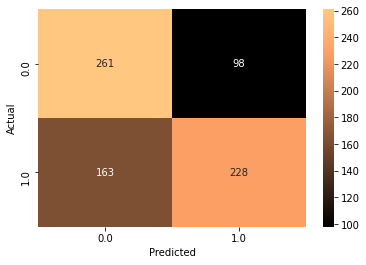

[[-1.31290884  2.01689033 -0.62291749 ... -1.50930031 -0.19071038
  -0.02481708]
 [-0.04490965  2.43395208 -0.0505386  ... -0.27252825  2.23539614
   0.10296298]
 [-0.22405993 -1.74440709  3.00100538 ...  0.63604114  0.20725946
  -0.76023662]
 ...
 [-0.68187186  0.62106835  0.07901602 ... -0.09550981 -1.07242201
  -1.03029075]
 [ 0.52707702  0.07582439 -0.0505386  ...  0.05523412 -0.68484877
   0.10296298]
 [-0.08923666 -1.10238946  0.48585946 ... -0.38674214 -0.89797906
  -0.0794077 ]]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0.
 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0.
 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 

In [ ]:
CNNsortedTrainData2Independent = CNNsortedTrainData2.drop(columns = ['label', 'confidence'], axis=1)  # drops the columns 'label' and 'confidence' as they aren't independent variables then stores into a new variable for independent variables
CNNsortedTrainData2Labels = CNNsortedTrainData2['label']# creates a variable for the labels, as this is what needs to be predicted
CNNsortedTrainData2Independent_train,CNNsortedTrainData2Independent_test,CNNsortedTrainData2Labels_train,CNNsortedTrainData2Labels_test = train_test_split(StandardScaler().fit_transform(CNNsortedTrainData2Independent),CNNsortedTrainData2Labels,test_size=0.25, random_state=0) #performs train_test_split with a test size of 25% and training size of 75% with no random state
logistic_regressionCNN= LogisticRegression() #creates the logistic regression variable
logistic_regressionCNN.fit(CNNsortedTrainData2Independent_train,CNNsortedTrainData2Labels_train) #fits the independent variables and the labels to the it's logistic regression classifier
CNNsortedTrainData2Labels_pred=logistic_regressionCNN.predict(CNNsortedTrainData2Independent_test)  #creates the variable for predictions and uses the classifier to make predictions
confusion_matrix = pd.crosstab(CNNsortedTrainData2Labels_test, CNNsortedTrainData2Labels_pred, rownames=['Actual'], colnames=['Predicted']) #inputs the labels and predictions into a confusion matrix for visualisation
sn.heatmap(confusion_matrix, annot=True,fmt="d",cmap='copper')#visual settings for confusion matrix
print('Accuracy of CNN feature selection test is: ',metrics.accuracy_score(CNNsortedTrainData2Labels_test, CNNsortedTrainData2Labels_pred))#prints the accuracy of the test
plt.show()

Performs logistic regression for the GIST feature selected training 2 data and puts it into a confusion matrix

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy of GIST feature selection test is::  0.652


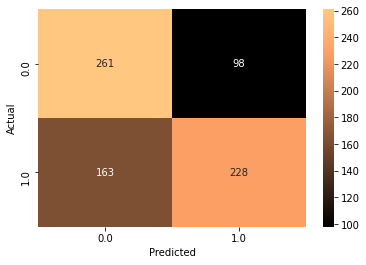

[[-1.31290884  2.01689033 -0.62291749 ... -1.50930031 -0.19071038
  -0.02481708]
 [-0.04490965  2.43395208 -0.0505386  ... -0.27252825  2.23539614
   0.10296298]
 [-0.22405993 -1.74440709  3.00100538 ...  0.63604114  0.20725946
  -0.76023662]
 ...
 [-0.68187186  0.62106835  0.07901602 ... -0.09550981 -1.07242201
  -1.03029075]
 [ 0.52707702  0.07582439 -0.0505386  ...  0.05523412 -0.68484877
   0.10296298]
 [-0.08923666 -1.10238946  0.48585946 ... -0.38674214 -0.89797906
  -0.0794077 ]]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0.
 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0.
 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 

In [ ]:
GISTsortedTrainData2Independent = GISTsortedTrainData2.drop(columns = ['label', 'confidence'], axis=1) # drops the columns 'label' and 'confidence' as they aren't independent variables then stores into a new variable for independent variables
GISTsortedTrainData2Labels = GISTsortedTrainData2['label']# creates a variable for the labels, as this is what needs to be predicted
GISTsortedTrainData2Independent_train,GISTsortedTrainData2Independent_test,GISTsortedTrainData2Labels_train,GISTsortedTrainData2Labels_test = train_test_split(StandardScaler().fit_transform(GISTsortedTrainData2Independent),GISTsortedTrainData2Labels,test_size=0.25, random_state=0)  #performs train_test_split with a test size of 25% and training size of 75% with no random state                                                                                                                                                         
logistic_regressionGIST= LogisticRegression() #creates the logistic regression variable
logistic_regressionGIST.fit(GISTsortedTrainData2Independent_train,GISTsortedTrainData2Labels_train) #fits the independent variables and the labels to the it's logistic regression classifier
GISTsortedTrainData2Labels_pred=logistic_regressionGIST.predict(GISTsortedTrainData2Independent_test)  #creates the variable for predictions and uses the classifier to make predictions
confusion_matrix = pd.crosstab(GISTsortedTrainData2Labels_test, GISTsortedTrainData2Labels_pred, rownames=['Actual'], colnames=['Predicted']) #inputs the labels and predictions into a confusion matrix for visualisation
sn.heatmap(confusion_matrix, annot=True,fmt="d",cmap='copper')#visual settings for confusion matrix
print('Accuracy of GIST feature selection test is: ',metrics.accuracy_score(GISTsortedTrainData2Labels_test, GISTsortedTrainData2Labels_pred)) #prints the accuracy of the test
plt.show()
